In [1]:
"""

Data: 08 Sep 2019
Author: Vinay Chourasiya
File: IndiaTSP

"""

'\n\nData: 08 Sep 2019\nAuthor: Vinay Chourasiya\nFile: IndiaTSP\n\n'

In [24]:
"Require packages"

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from subprocess import Popen, PIPE
import os
import time

In [25]:
"Basic Data collection"

df = pd.read_csv('Districts.csv',encoding='ISO-8859-1')
print(df.head())
lat = df['Lat']
long = df['Long']
city = df['District']

   State       District  Pop_Density        Lat       Long  Population
0  Delhi          Delhi      11000.0  28.612721  77.231253   553561000
1     AP      Anantapur        213.0  14.681888  77.600591     4083315
2     AP        Chittor        275.0  13.217176  79.100329     4170468
3     AP  East Godavari        477.0  17.321250  82.040714     5151549
4     AP         Guntur        429.0  16.306652  80.436540     4889230


In [26]:
"Data file Preparaion"
def WriteDataFile():
    """
    We try to prepare standard data file
    which is used for directly input for concorde
    solver
    """

    with open("india.tsp",'w') as datafile:
        datafile.write("NAME: IndiaTSP \n")
        datafile.write("TYPE: TSP \n")
        datafile.write("COMMENT: India TSP (district of all states covered) \n")
        datafile.write("DIMENSION: "+str(len(city))+"\n")
        datafile.write("EDGE_WEIGHT_TYPE: GEO \n")
        datafile.write("DISPLAY_DATA_TYPE: COORD_DISPLAY \n")
        datafile.write("NODE_COORD_SECTION \n")
        for i in range(len(city)):
            datafile.write(str(i))
            datafile.write(" "+str(lat[i]))
            datafile.write(" "+str(long[i]))
            datafile.write("\n")

In [27]:
"TSP tour generation using concorde solver"
# os.chdir("/home/vinay")
def GenerateTour():
    cmd = "LINKERN/linkern  -Q -o india.out india.tsp"
    results = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # Pausing for running the LINKERN algo 
    time.sleep(2)

In [28]:
def Read_n_Plot():
    #--------reading out file--------  
    with open("india.out") as f:
        data = []
        for l in f:
            temp1 = l.split()
            data.append([int(i) for i in temp1])
    if len(data[0])<3:
        del data[0]
    datanp = np.array(data)
    Edges = datanp[:,:-1] 
    # -------"ploting"-----------
    
    D = nx.DiGraph()
    for i in range(len(city)):
        D.add_node(i,pos = (lat[i],long[i]))
    for e in Edges:
        D.add_edge(*e)

    plt.figure(figsize=(15, 13))
    pos=nx.get_node_attributes(D,'pos')
    nx.draw(D,pos,node_size=10,node_color="black", edge_color="blue")
    plt.savefig("indiatspmap.png")

In [29]:
def Cleaning():
    """
    Removing temporary files that generate 
    during the execution
    """
    os.remove("india.out")
    os.remove("india.tsp")

In [30]:
def MainAlgo():
    """
    Running the complete programme
    """
    WriteDataFile()
    GenerateTour()
    Read_n_Plot()
    Cleaning()

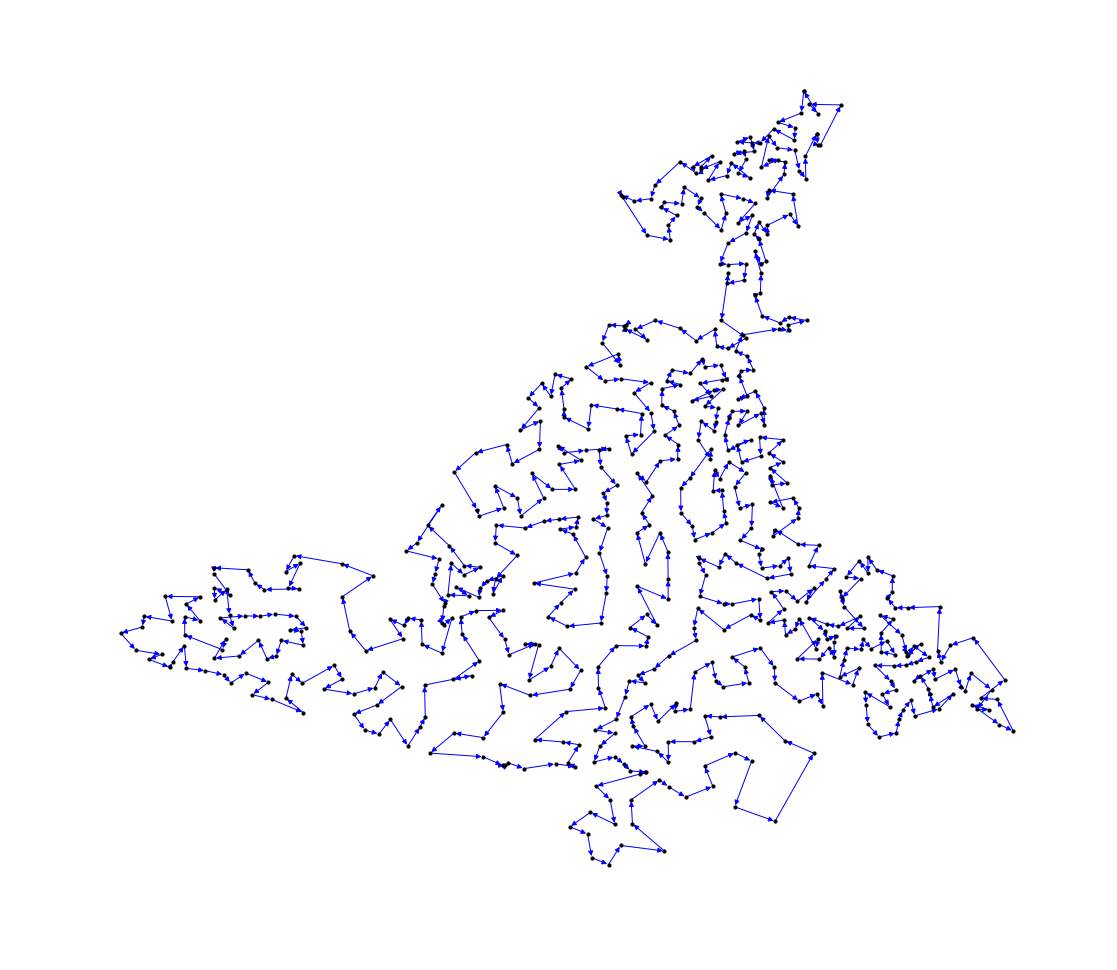

In [31]:
MainAlgo()